## Data Story Telling on Capstone 1 Data Set

Below is some exploratory analysis I have done on the data set. I try to find factors which may be responsible for why customers default on thier payments. The data is a mix of categorical data as well as numerical data (payment and limit balances).

In [1]:
# Importing all packages used for the analysis
#Data Cleaning and Exploratory Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Math functions used for feature engineering
from math import log

#Data manipulation
import re

%matplotlib inline
sns.set()
sns.set_context("notebook", font_scale=1.5)

In [2]:
#function -  ecdf: helper method to chart ECDF graphs
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [3]:
#Importing the data
#importing file - saved file as csv file and then read it
df = pd.read_csv('C:/Users/ASUS/CapStone1_ExploratoryTests_CCardData/Data Sets/ccclients_v2.csv')
#attribute to get column names
print(df.columns)
print('=====================================')
#shape of the data
print('Data Shape:',df.shape)
print('=====================================')

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
Data Shape: (30000, 25)


In [6]:
#renaming 'default payment next month' to 'default'
df['default'] = df['default payment next month']
df.drop(['default payment next month'], 1, inplace=True)

#rename column PAY_0 to PAY_1 for uniformity
df.rename(columns={'PAY_0':'PAY_1'})

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
#Basics: Describing the data
# practice basics
#describing the data to identify possible outliers
print(df.describe())

                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802

#### Q. Gender as a factor in payment defaults

2    18112
1    11888
Name: SEX, dtype: int64


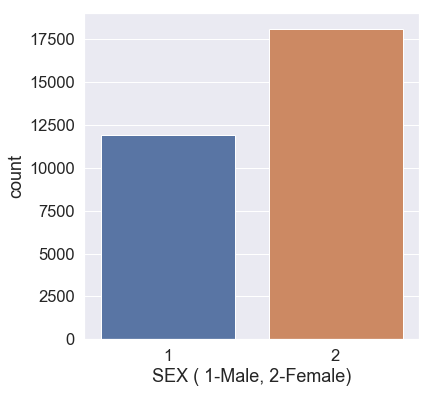

default  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
Name: ID, dtype: int64
2873


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


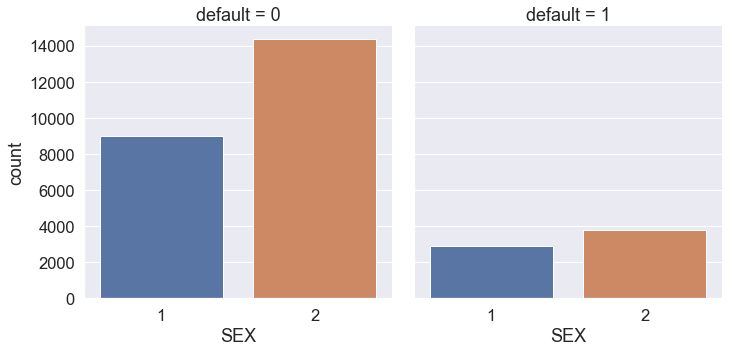

Gender = 1: Ratio of Defaulters and Total 0.2416722745625841
Gender = 2: Ratio of Defaulters and Total 0.20776280918727916


In [15]:
#value_counts() - trying to identify outliers + plotting bar charts for each of the dimensions to observe distribution
#Ploting bar charts because these are all categorical values
print('=====================================')
print(df['SEX'].value_counts(dropna=False))
df_count  = df['SEX'].value_counts(dropna=False)

print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='SEX',data=df) #seaborn's countplot to plot bar charts showing counts
plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','SEX']).ID.count())
df_defaulters = df.groupby(['default','SEX']).ID.count()
print(df_defaulters[1][1])
print('=====================================')

_ = sns.factorplot(x='SEX', col='default', data=df, kind='count', size =5)
plt.show()


print('Gender = 1: Ratio of Defaulters and Total', df_defaulters[1][1]/df_count[1])
print('Gender = 2: Ratio of Defaulters and Total', df_defaulters[1][2]/df_count[2])

It seems that the gender with the category = 2, have in general more defaults than gender = 1. However, this doesnt mean that gender =2 tend to default more. 
The proportion of gender 2 who default is greater than those of gender 1 who have defaulted.

#### Q. Education as a factor in payment defaults

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


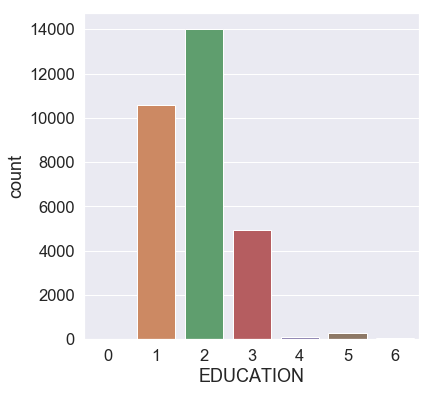

default  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
Name: ID, dtype: int64


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


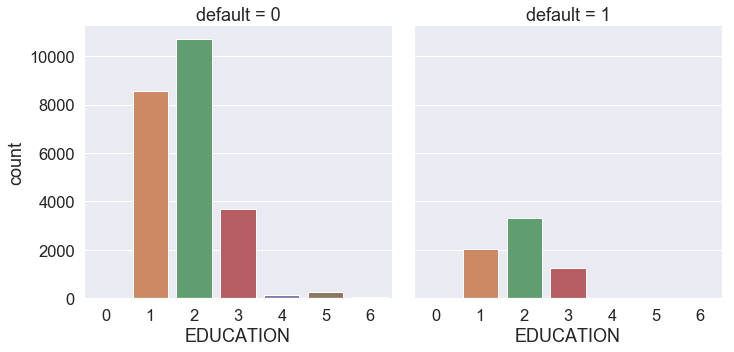

Education = 1: Ratio of Defaulters and Total 0.19234766178554558
Education = 2: Ratio of Defaulters and Total 0.23734853884533144
Education = 3: Ratio of Defaulters and Total 0.2515761643278422
Education = 4: Ratio of Defaulters and Total 0.056910569105691054
Education = 5: Ratio of Defaulters and Total 0.06428571428571428
Education = 6: Ratio of Defaulters and Total 0.1568627450980392


In [19]:
print('=====================================')
print(df['EDUCATION'].value_counts(dropna=False))
df_ed = df['EDUCATION'].value_counts(dropna=False)
print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='EDUCATION',data=df) #seaborn's countplot to plot bar charts showing counts
#plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','EDUCATION']).ID.count())
df_ed_def = df.groupby(['default','EDUCATION']).ID.count()
print('=====================================')

_ = sns.factorplot(x='EDUCATION', col='default', data=df, kind='count', size =5)
plt.show()


print('Education = 1: Ratio of Defaulters and Total', df_ed_def[1][1]/df_ed[1])
print('Education = 2: Ratio of Defaulters and Total', df_ed_def[1][2]/df_ed[2])
print('Education = 3: Ratio of Defaulters and Total', df_ed_def[1][3]/df_ed[3])
print('Education = 4: Ratio of Defaulters and Total', df_ed_def[1][4]/df_ed[4])
print('Education = 5: Ratio of Defaulters and Total', df_ed_def[1][5]/df_ed[5])
print('Education = 6: Ratio of Defaulters and Total', df_ed_def[1][6]/df_ed[6])


Similarly, people with education = 3, have the highest proportion of defaulters. Almost 25%. People with education = 2 are also not behind. They are also the largest group of people.  

#### Q. Marriage as a factor in payment defaults

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


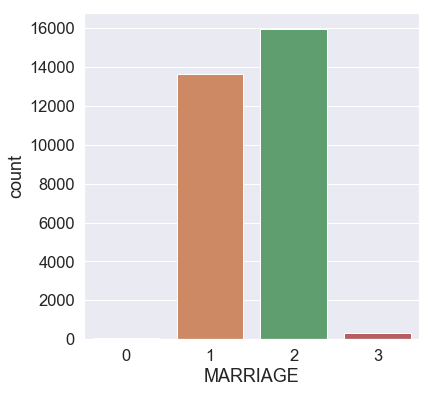

default  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
Name: ID, dtype: int64


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


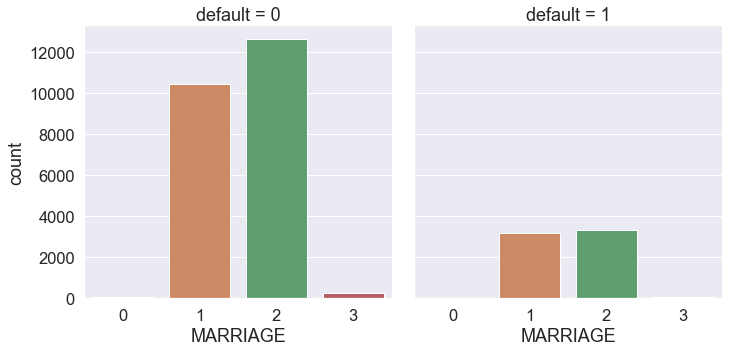

In [20]:
print('=====================================')
print(df['MARRIAGE'].value_counts(dropna=False))
print('=====================================')
plt.figure(figsize=(6,6))
_ = sns.countplot(x='MARRIAGE',data=df) #seaborn's countplot to plot bar charts showing counts
#plt.xlabel('SEX ( 1-Male, 2-Female)')
plt.show()

print('=====================================')
print(df.groupby(['default','MARRIAGE']).ID.count())
print('=====================================')

_ = sns.factorplot(x='MARRIAGE', col='default', data=df, kind='count', size =5)
plt.show()

From the histograms, it can be easily concluded that a larger proportion of people with marriage status = 1 are defaulters. 

#### Q. Balance Category as a factor in defaults

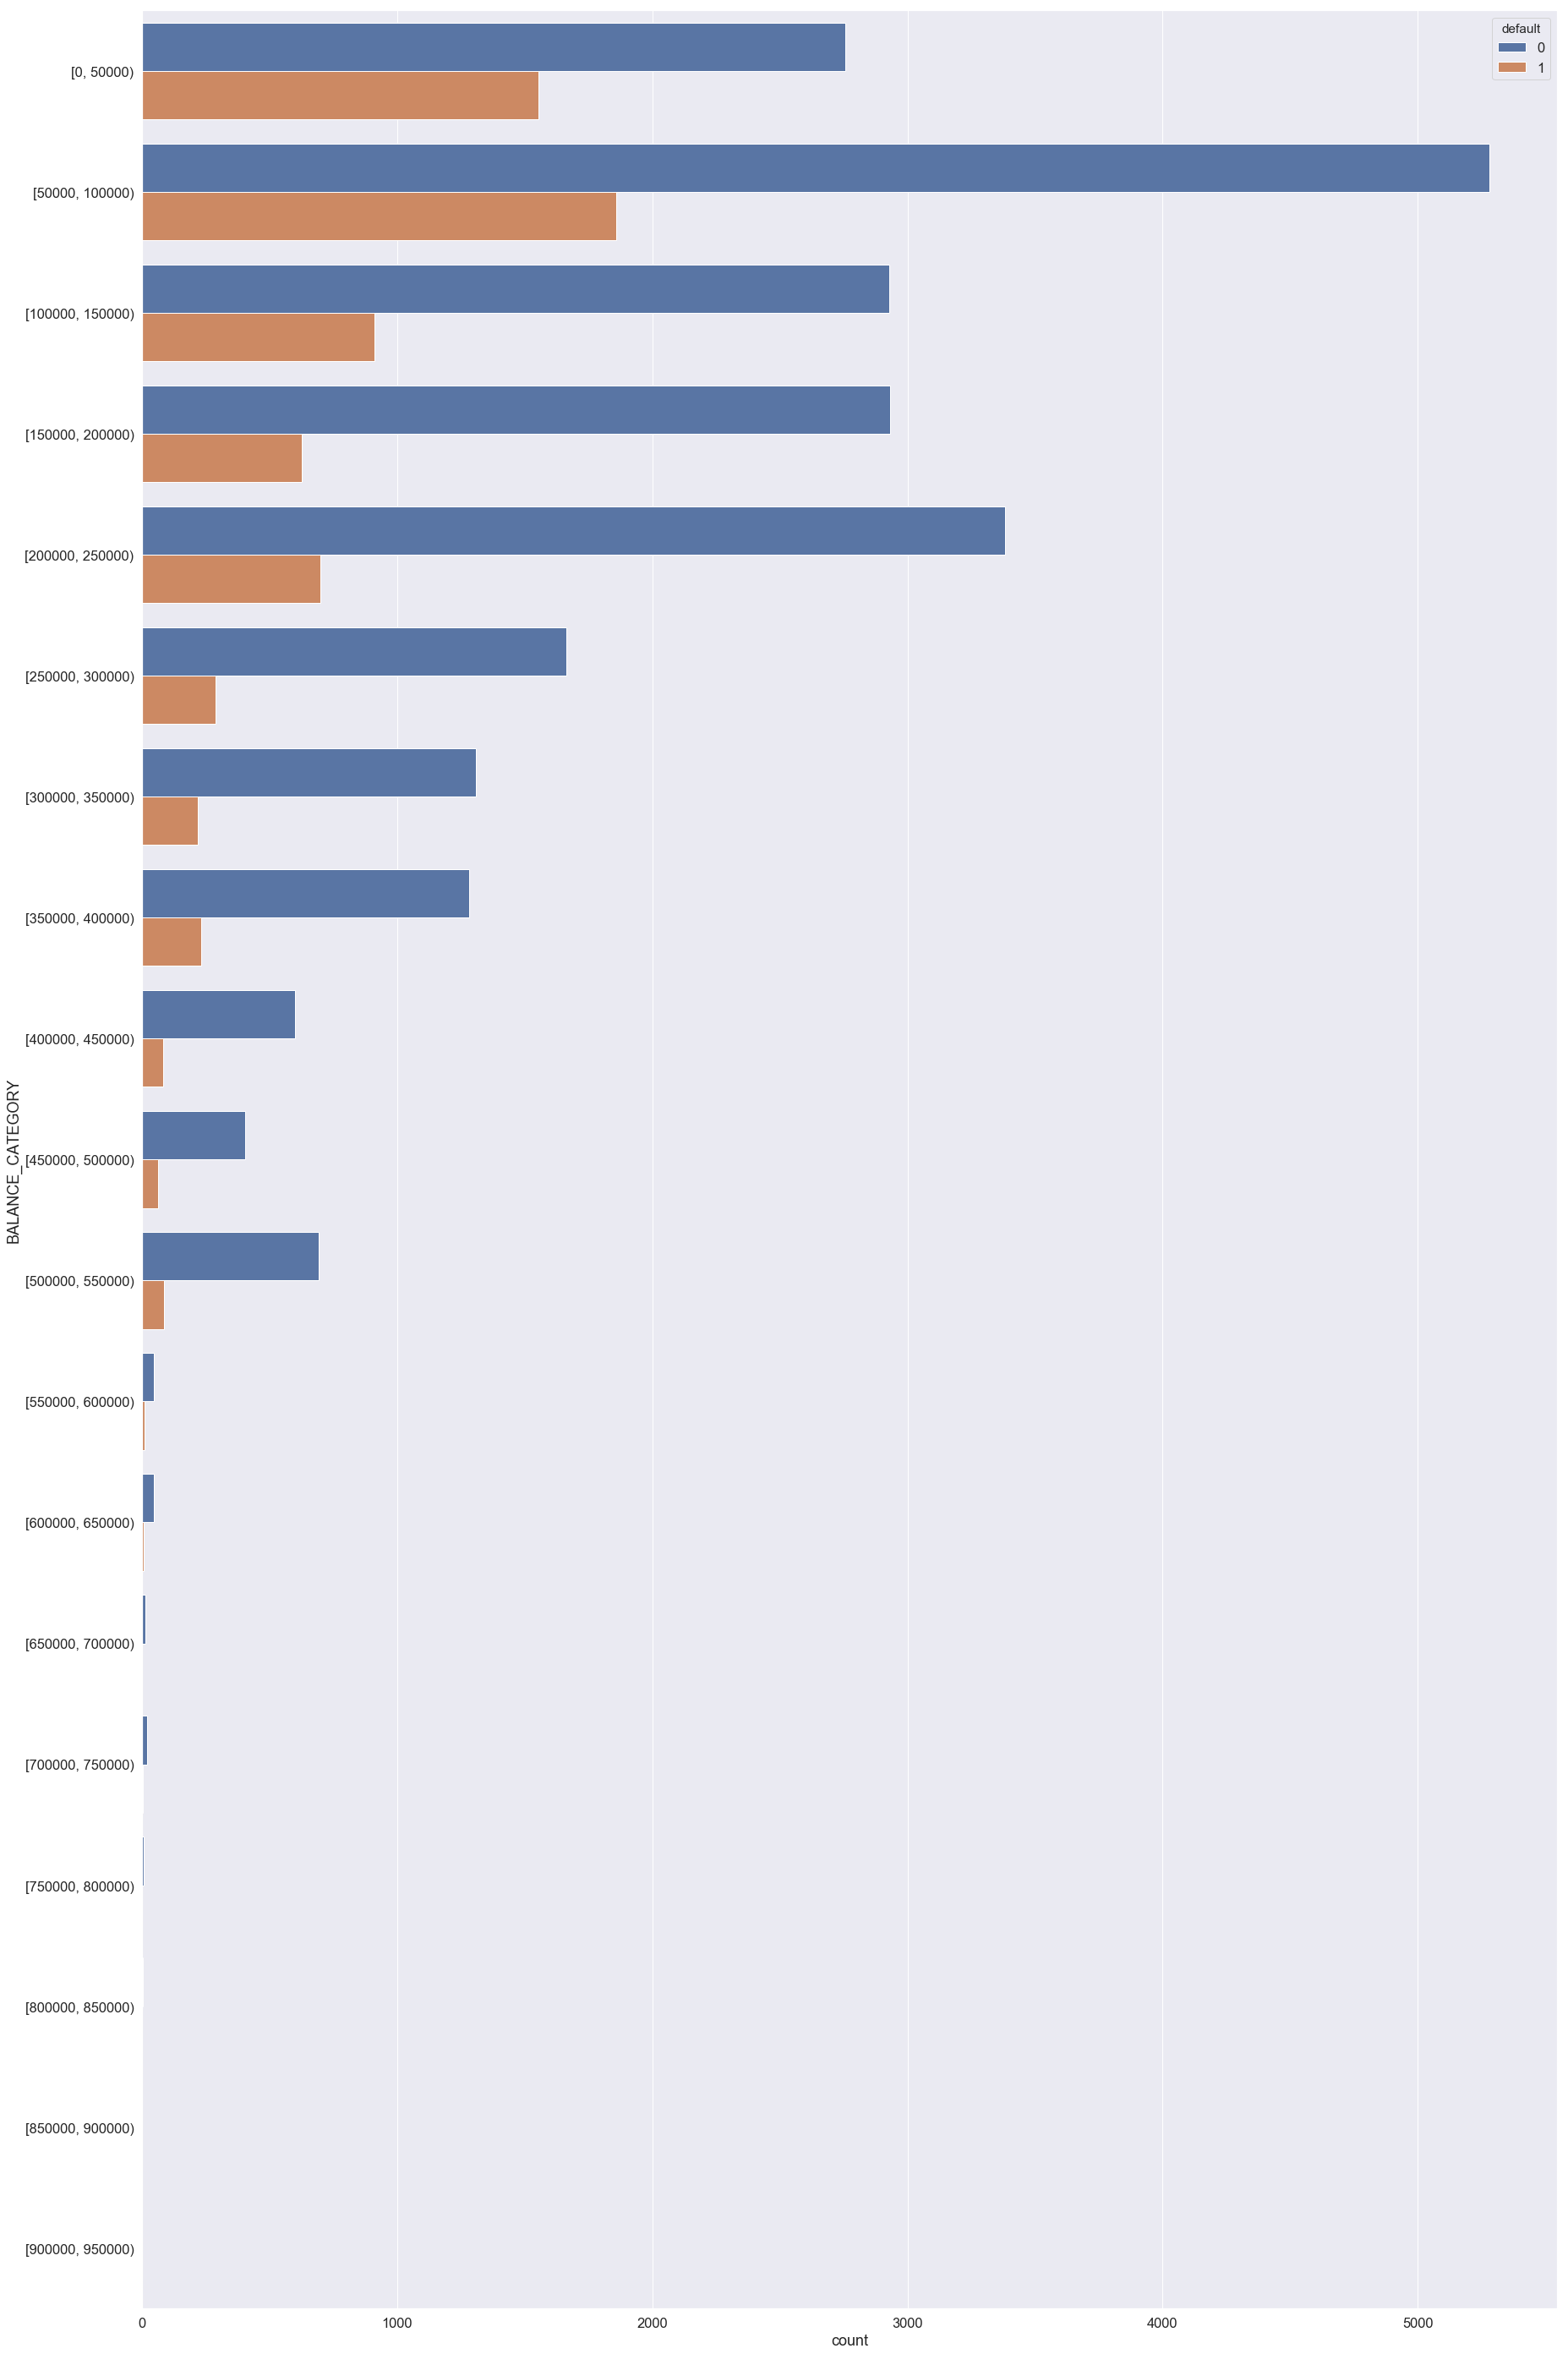

In [21]:
df['BALANCE_CATEGORY'] = pd.cut(df['LIMIT_BAL'], range(0, int(1e6), 50000), right=False)
plt.figure(figsize=(30,50))
_= sns.countplot(y='BALANCE_CATEGORY',hue='default', data=df) #seaborn's countplot to plot bar charts showing counts
plt.show()

It can be observed here that people with the balance limits between 0 and 50000 are the ones who have the highest default rate. 


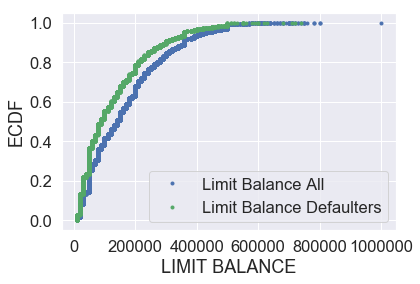

In [22]:
#ECDF on Balance limits
x_limitBal, y_limitBal = ecdf(df['LIMIT_BAL'])
df_default=df.loc[df['default']==1]
x_limitBal_d, y_limitBal_d = ecdf(df_default['LIMIT_BAL'])

_=plt.plot(x_limitBal,y_limitBal,marker='.', linestyle='none')
_=plt.plot(x_limitBal_d,y_limitBal_d,marker='.', linestyle='none', color='g')

plt.margins(0.05)
_=plt.xlabel('LIMIT BALANCE')
_=plt.ylabel('ECDF')
plt.legend(('Limit Balance All', 'Limit Balance Defaulters'), loc='lower right')
plt.show()

80% of defaulters have thir limit balances less than or equal to 200000.